In [1]:
# importing all required packages ( seaborn , pandas , matplotlib and numpy )
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# loading two data sets as csv format in panadas dataframe
steps = pd.read_csv('steps data.csv',delimiter=';')
survey = pd.read_csv('survey data.csv')
# visulaising the two datadframes by .head function
steps.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,641.0,4045.0,2310.0,2480.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,25.0,4067.0,7192.0,154.0,8674.0,8275.0,850.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
survey.head()


,id,city,gender,age,hh_size,hh_type,education,height,weight,waist
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0


In [4]:
# merged the dataframes into one datafrmae
# adding the mean_steps for each person
survey['average_survey'] = 0  
for r in range(929):
    mean = np.array(list(steps.iloc[r, 10:]))
    mean = np.nanmean(mean)
    if (str(mean) != 'nan'):
        survey.iloc[r,10]=mean  
survey

C:\Users\NEHA_\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,average_survey
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,6757.911765
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,3455.074074
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,4986.550505
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0,6376.038168
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0,5516.014493
...,...,...,...,...,...,...,...,...,...,...,...
924,925,Bordeaux,male,25-34,5,family,high school,177.0,69.0,88.0,9903.045455
925,926,Bordeaux,male,35-44,1,single,bachelor,172.0,66.0,81.0,5242.325000
926,927,Lyon,female,45-54,3,family,primary,169.0,108.0,108.0,8816.908714
927,928,Montpellier,female,35-44,1,single,master or doctorate,167.0,64.0,85.0,5431.582160


In [5]:
# finding the mean for every id
survey.mean(axis = 0).dropna()

id                 465.000000
hh_size              2.329386
height             171.754595
weight              72.045307
waist               85.794181
average_survey    5695.057738
dtype: float64

In [6]:
survey.mean(axis = 1).dropna()

0      1180.651961
1       626.179012
2       881.425084
3      1124.173028
4       975.169082
          ...     
924    1861.174242
925    1081.387500
926    1688.651452
927    1112.763693
928    2197.412209
Length: 929, dtype: float64

In [7]:
# creating a dataframe with the mean
survey["average_steps"] = survey.mean(axis =1)
survey.head(5)

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,average_survey,average_steps
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,6757.911765,1180.651961
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,3455.074074,626.179012
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,4986.550505,881.425084
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0,6376.038168,1124.173028
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0,5516.014493,975.169082


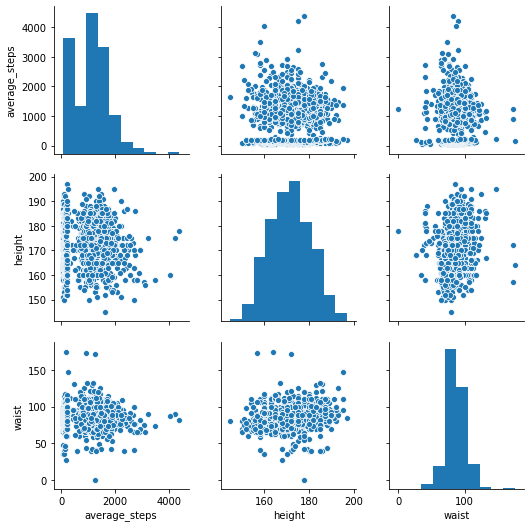

In [8]:
# ploting pairplot for averge steps with two variables

survey_sel = survey[['average_steps', 'height','waist']]
sns.pairplot(survey_sel.dropna())
plt.show()


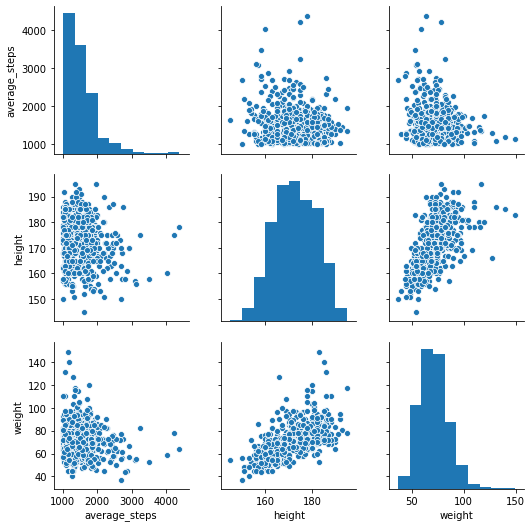

In [9]:
# cleaning the data

survey = survey[(survey['average_steps'] > 1000)& (survey['height'] > 10) & (survey['weight'] > 0)]
survey_sel = survey[['average_steps','height','weight']]
sns.pairplot(survey_sel.dropna())
plt.show()



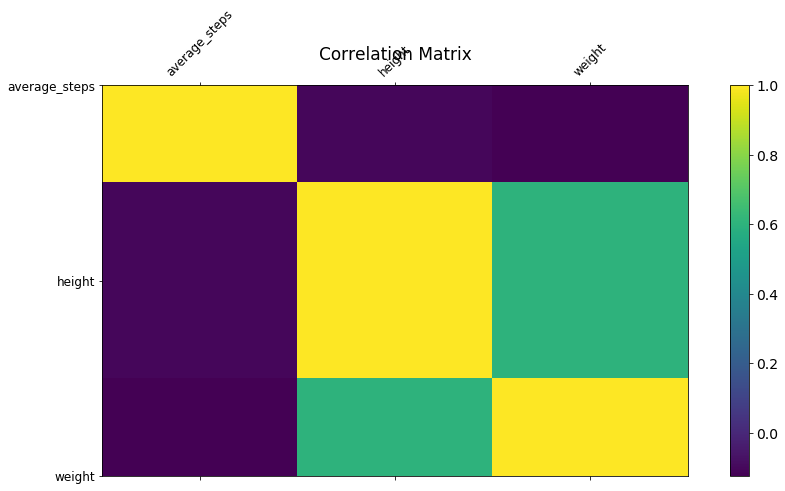

In [10]:
# Correlation matrix including all 3 variables

f = plt.figure(figsize=(15, 7))
plt.matshow(survey_sel.corr(), fignum=f.number)
plt.xticks(range(survey_sel.shape[1]), survey_sel.columns, fontsize=12, rotation=45)
plt.yticks(range(survey_sel.shape[1]), survey_sel.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=17);



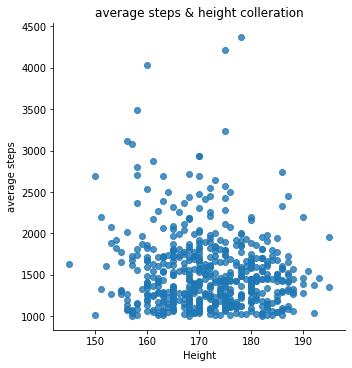

In [11]:
# 2 scatter plots in total with 2 other variables
# found a relevant correlaion between height and average steps

sns.lmplot(x='height', y='average_steps', fit_reg=False, data=survey_sel) 
plt.xlabel('Height') 
plt.ylabel('average steps')
plt.title('average steps & height colleration')
plt.show()


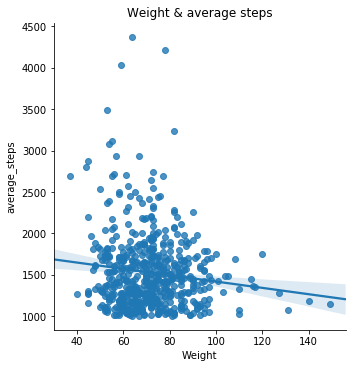

In [12]:
# in result of both scatter plots , shows
# with less weight of a person take more steps

sns.lmplot(x='weight', y='average_steps', fit_reg=True, data=survey_sel) 
plt.xlabel('Weight') 
plt.ylabel('average_steps')
plt.title('Weight & average steps')
plt.show()

In [13]:
# Pearsons correlation for the 2 relatons

from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy
print(pearsonr(survey_sel['average_steps'],survey_sel['weight']))
print(pearsonr(survey_sel['average_steps'],survey_sel['height']))

(-0.12285024599732906, 0.003564663975213108)
(-0.10513233972371419, 0.012721955090592797)


In [14]:
# Output from pearsons correlaton shows the two numbers :
# r = -0.12  , and p = 0,003
# (r=-0.12) shows weight and average steps are strongly correlated
# The correlation is highly significant with the value (p<0.003)
# in second result 'r' is smaller means average steps and height have
# smaller corellation than with the weight


In [15]:
# The relation of mean steps per participant with a qualitative variable with two levels

survey_relation = survey[["gender","average_steps"]].dropna()
survey_relation = survey_relation[survey_relation["average_steps"]>10]
survey_relation


,gender,average_steps
0,male,1180.651961
3,male,1124.173028
7,female,1261.687500
9,female,1163.639506
10,male,2286.564815
...,...,...
924,male,1861.174242
925,male,1081.387500
926,female,1688.651452
927,female,1112.763693


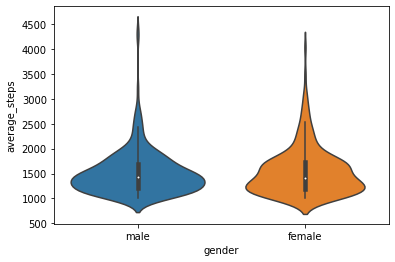

In [16]:
# Graphs of the relation (e.g. histogram, violin plot, bar plot)

ax = sns.violinplot(x="gender", y="average_steps", data=survey_relation)


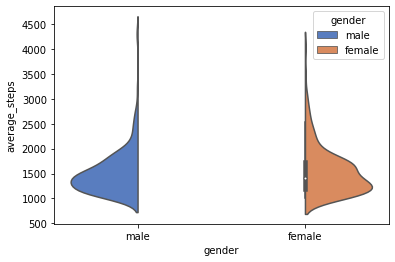

In [17]:
# visibility not really clear in the difference

ax = sns.violinplot(x="gender", y="average_steps", hue="gender",
                    data=survey_relation, palette="muted", split=True,
                    scale="count")


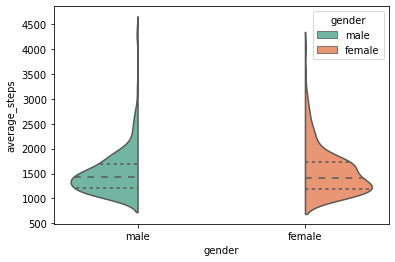

In [18]:
# with lines can see small difference

ax = sns.violinplot(x="gender", y="average_steps", hue="gender",
              data=survey_relation, palette="Set2", split=True,
                    scale="count", inner="quartile")

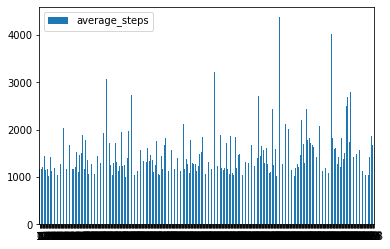

In [19]:
# T-Test with two qualitative variables shows in bar graphs

ax = survey_relation.plot.bar(rot=1)


In [20]:
# The relation between two qualitative variables

df2 = survey[["gender","education"]].dropna()
df2.head(5)


,gender,education
0,male,master or doctorate
3,male,bachelor
7,female,bachelor
9,female,high school
10,male,bachelor


In [21]:

pd.crosstab(df2["gender"], survey["education"])


education,bachelor,high school,master or doctorate,no degree,primary,vocational
gender,,,,,,
female,96,38,111,0,4,7
male,130,22,141,1,3,8


In [22]:
pd.crosstab(df2["gender"],df2["education"], normalize="columns")


education,bachelor,high school,master or doctorate,no degree,primary,vocational
gender,,,,,,
female,0.424779,0.633333,0.440476,0.0,0.571429,0.466667
male,0.575221,0.366667,0.559524,1.0,0.428571,0.533333


In [23]:
# in result the main difference is more females will go to high school as the male